In [12]:
import os
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, Latex
import json
from utils import CobbDouglasIC, CobbDouglasConsumer
from utils import cbeq, polyeq, term, is_divisible, Number
from matplotlib import pyplot as plt

SMALL_SIZE = 14
MEDIUM_SIZE = 16
LARGE_SIZE = 18
HUGE_SIZE = 20

plt.rcdefaults()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = MEDIUM_SIZE
plt.rcParams['axes.titlesize'] = LARGE_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
plt.rcParams['figure.titlesize'] = LARGE_SIZE
plt.rcParams['figure.figsize'] = [7.2, 7.2]
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.facecolor'] = (1.0, 1.0, 1.0, 0.0)

JSON_FILE = "../assets/data/wk07_practice.json"
IMAGE_PATH = "../assets/images/wk07"
probs = []
nprob = 0

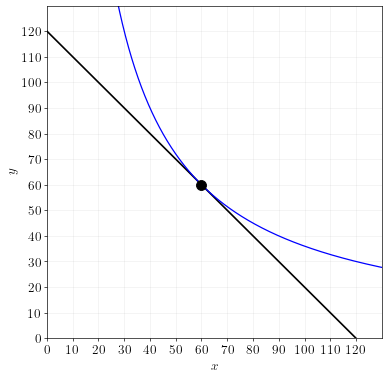

True

In [13]:
prob = CobbDouglasConsumer()
prob.graph_schematic(show=True)

In [14]:
# Cobb Douglas Consumer
df = pd.read_csv("CobbDouglasConsumer_examples.csv")
mydf = pd.concat([
    df.loc[ (df['dx']==2) ].sample(25),
    df.loc[ (df['dx']>2) ].sample(25)
]).reset_index(drop=True)
    
for idx, row in mydf.iterrows():
    params = dict(row).copy()
    prob = CobbDouglasConsumer(params)
    xopt = prob.sol['x']
    yopt = prob.sol['y']
    filename = f"practice_problem_{nprob}.png"
    prob.graph_schematic(show=False, saveas=f"{IMAGE_PATH}/{filename}")
    setup = prob.setup()
    setup += fr"""
<p>1. Solve for the optimal consumption bundle of \(x\) and \(y\).</p>
<p>2. Draw a diagram representing the solution.</p>
"""
    solution = fr"""
$$ x^* = {xopt:g} $$

$$ y^* = {yopt:g} $$

<img src="/CSUN-Econ-310/assets/images/wk07/{filename}">
"""
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))

50


In [15]:
# Cobb Douglas Consumer
df = pd.read_csv("CobbDouglasConsumer_examples.csv")
mydf = pd.concat([
    df.loc[ (df['dx']==2) ].sample(20),
    df.loc[ (df['dx']>2) ].sample(20)
]).reset_index(drop=True)
    
for idx, row in mydf.iterrows():
    params = dict(row).copy()
    nx, dx, ny, dy, I, px, py, gmax = params['nx'], params['dx'], params['ny'], params['dy'], params['I'], params['px'], params['py'], params['gmax']
    prob = CobbDouglasConsumer(params)
    xopt = prob.sol['x']
    yopt = prob.sol['y']
    setup_filename = f"practice_problem_setup_{nprob}.png"
    solution_filename = f"practice_problem_solution_{nprob}.png"
    prob.graph_with_IC(with_solution=False, show=False, saveas=f"{IMAGE_PATH}/{setup_filename}")
    prob.graph_with_IC(with_solution=True, show=False, saveas=f"{IMAGE_PATH}/{solution_filename}")
    setup = fr"""
<p>A consumer with income \(I = {I:g}\) has a utility function over two goods, \(x\) and \(y\), 
represented by the indifference curves below:</p>

<img src="/CSUN-Econ-310/assets/images/wk07/{setup_filename}">

<p>The price of good \(x\) is \(p_x = {px:g}\) and the price of good \(y\) is \(p_y = {py:g}\).</p>

<p>1. Draw the budget constraint.</p>
<p>2. What is the optimal choice of \(x\) and \(y\)?</p>
"""
    solution = fr"""
$$ x^* = {xopt:g} $$

$$ y^* = {yopt:g} $$

<img src="/CSUN-Econ-310/assets/images/wk07/{solution_filename}">
"""
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))

90


In [16]:
with open(JSON_FILE, 'w') as f:
    json.dump(probs, f)

In [17]:
with open(JSON_FILE, 'r') as f:
    myprobs = json.load(f)

In [18]:
prob = np.random.choice(myprobs)
display(Latex(prob['setup']))
display(Latex(prob['solution']))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [19]:
len(myprobs)

90